<a href="https://colab.research.google.com/github/rogeriomoreirajr/Imersao_Alura_2020/blob/main/Importando_o_Enem_pro_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o Enem pro Colab

É claro que é divertido a gente trabalhar com a amostra que foi disponibilizada - mas ~ cientista de dados ~ que se preze não se contenta com poucos dados, principalmente quando quer checar se uma conclusão na amostra bate com o dataset completo.

Acontece que, independente da sua velocidade de internet, o Inep tem um limite de banda para fazermos o download dos dados. Por outro lado, subir 3GB de dados pro colab não faz bem pra internet de ninguém - e nem pro espaço no Google Drive.

Para resolver isso, encontrei um [texto no Medium](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a) que explica bem como fazer isso - e reproduzo aqui, no Colab, pra você só precisar copiar pro Drive e sair raspando os dados.

## Conseguindo uma API no Kaggle

Falei ali acima de que o servidor do Inep tem um limite para o tráfgeo. De onde podemos conseguir eles então? Do **[Kaggle](https://www.kaggle.com/)**, que é conhecido tanto pelos desafios que promove quanto pelos datasets que hospeda gentilmente.

O primeiro passo então é se registrar lá (caso não tenha uma conta, é 0800), clicar no canto superior direito (na sua foto de perfil), e depois em `My Account`. Na tela que aparece, mais pra baixo, tem um botão `Create New API Token`. Você clica nele e o site baixa um arquivo, `kaggle.json`. Esse arquivo tem as suas credenciais no Kaggle. Crie uma pasta chamada `Kaggle` no Google Drive, e suba o json lá dentro.

![](https://miro.medium.com/max/576/1*ck7tx-CiJ9kODRAKgXEOQQ.png)

Agora, vamos ao código.

## Colocando o Drive no Colab

Você já fez a cópia desse arquivo no seu drive? Se sim, você já pode editar ele. Monte o Drive dentro do notebook (clicando no ícone de pasta ali do lado, e depois no botão "montar Drive").

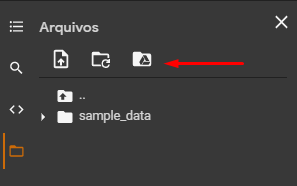

Agora, o Colab consegue acessar o Google Drive como se fosse uma pasta, um diretório. Lembra o `kaggle.json` que você salvou? Agora vamos ter acesso a ele, e poder se comunicar com o dataset do ENEM.

## Crianco o ambiente para o Kaggle

Rode a célula abaixo para ativar suas credenciais no Colab

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

# /content/gdrive/My Drive/Kaggle é onde salvamos o kaggle.json

Agora você pode mudar onde vai ser o seu diretório de trabalho. No artigo original o autor falava em mudar para dentro do Drive. 
- A **parte boa** é que o que você baixar do kaggle vai ficar salvo dentro do Drive, e *não ser deletado* depois de um tempo (que é o que acontece quando você sobe algo diretro pro Colab). 
- A **parte ruim** é que *fica salvo dentro do Drive*, três gigabytes de arquivo disputando o espaço com aqueles anexos grandes de dez anos atrás. E não é agora que você vai deletar esses e-mails, né.

Como o tempo de download e unzip é rápido (você já vai ver), eu prefiro deixar o working directory pro `/contents/` mesmo. Mas fica a seu critério. Se quiser mudar, rode essa célula:

In [5]:
%cd /content/gdrive/My Drive/Kaggle

!ls -d

# Ou outra pasta que preferir

/content


E, agora, a magia.

## Baixando e descompactando o dataset do Enem 2009]

O dataset que vamos usar foi colocado no kaggle pelo [Marciano Saraiva](https://www.kaggle.com/saraivaufc) (que acabei de conhecer e já respeito pacas), e está disponível [nesse link](www.kaggle.com/saraivaufc/enem-2019). Como você pode ver, ele subiu o zip do INEP inteiro, compactado em 600 mb. Sabe aquela mala voltando de viagem? Esse aqui tá mais apertado.

Agora, para baixar e abrir os arquivos, bastam as duas linhas da célula abaixo:

In [ ]:
!kaggle datasets download -d saraivaufc/enem-2019
# Usamos o magic `!kaggle` para acessar a API e baixar o dataset
# Se ele não encontrar o kaggle.json, suba ali ali pelo menu da esquerda: 
# clique com o segundo botão na pasta `My Drive\Kaggle` e depois em `Upload`

!unzip \*.zip  && rm *.zip
# Usamos o magic `!unzip` para extrair os arquivos e deletar o zip depois

 62% 422M/679M [00:17<00:07, 38.4MB/s]

Se deu tudo certo, você vai ver essas pastas ali no menu da esquerda:

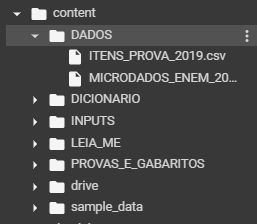

O processo roda toda nas máquinas do Google, então não deve levar muito tempo (aqui foi em seis segundos).

Temos todos os dados salvos aqui, no Colab. Agora, é só pedir pro Computador da Nasa que o Google tem para transformar o csv num DataFrame, né?

Não, infelizmente, não.

Tentei rodar algumas vezes o código aqui, depois de salvar os arquivos, mas o Colab sempre acabava _reiniciando_. De algum modo, foi demais para o Google (sim, provavelmente o YouTube caiu em algum lugar por causa disso. Perdão pelo vacilo).

Mas isso não quer dizer que não dá pra usar o arquivo de 3GB - claro que não. A questão é que, ao invés de criar um único DataFrame Gigantesco, o que vamos fazer é filtrar o CSV para termos só os dados que queremos.

Por exemplo: para descobrir de que estados são os candidatos com menos de 14 anos, faria algo assim:

In [ ]:
import pandas as pd

dados = []
chunksize = 10**6
# Chunksize é o tamanho de cada "pedaço" do arquivo que o pandas vai trabalar

path = '/content/DADOS/MICRODADOS_ENEM_2019.csv'

chunks = pd.read_csv(path, sep=';', encoding='latin1', chunksize = chunksize)
# Estou criando um iterador, uma ~lista~ com vários pedaços do CSV de 3gb
# Esse arquivo do INEP tem as particularidades: usa `;` como separados, 
# e tá codificado em `latin1`. É bem comum datasets do governo terem esse encoding

for chunk in chunks:
    # Para cada pedaço do arquivo
    
    dado = chunk.query('NU_IDADE < 15') 
    # Filtrando quem tem 14 anos ou menos dentro do chunk

    colunas = ['SG_UF_NASCIMENTO', 'NU_IDADE'] 
    # Pode incluir outras colunas, não afeta muito a performance

    dados.append(dado[colunas])
    # vou colocal na lista `dados` o DataFrame filtrado
    
    print('.') 
    # Só para sabermos que algo está acontecendo

df = pd.concat(dados)
df.head()

,SG_UF_NASCIMENTO,NU_IDADE
1608,PA,14
2272,PA,14
3310,PA,14
3998,PA,13
4179,PA,14


EIS OS DADOS.

Bom, qualquer dúvida, bug ou sugestão, meu nick no discord é `rogeriomoreirajr`, mas sou oldschool e uso e-mail, então pode falar comigo pelo `rogeriomoreirajr at gmail.com`. E, não, não tenho redes sociais. Assisti _The Social Dilemma_.